#### This notebook aims to see why the diagonal noise is being created at the intersection of the open boundary domains and if the cause of such a boundary is because we have different data at those grid points.



In [7]:
import numpy as np
import numpy.ma as ma
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib as mpl
from salishsea_tools import viz_tools, geo_tools,nc_tools
from scipy.interpolate import griddata, interp1d
import matplotlib.cm as cm

### First we will run a check on our 2d files

In [9]:
west_bdy = nc.Dataset('/ocean/ssahu/CANYONS/bdy_files/2d_west_m04.nc');
west_ssh = west_bdy.variables['sossheig'];


north_bdy = nc.Dataset('/ocean/ssahu/CANYONS/bdy_files/2d_north_m04.nc');
north_ssh = north_bdy.variables['sossheig'];

south_bdy = nc.Dataset('/ocean/ssahu/CANYONS/bdy_files/2d_south_m04.nc');
south_ssh = south_bdy.variables['sossheig'];

In [15]:
print(np.where(west_ssh == north_ssh), np.where(west_ssh == south_ssh))

(array([], dtype=int64),) (array([], dtype=int64),)


In [14]:
print(np.mean(west_ssh), np.mean(south_ssh) , np.mean(north_ssh))

0.0150366 0.0144211 -0.00728557


In [35]:
nc_tools.show_dimensions(west_bdy)

<class 'netCDF4._netCDF4.Dimension'>: name = 'xbT', size = 100

<class 'netCDF4._netCDF4.Dimension'>: name = 'yb', size = 4

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 43



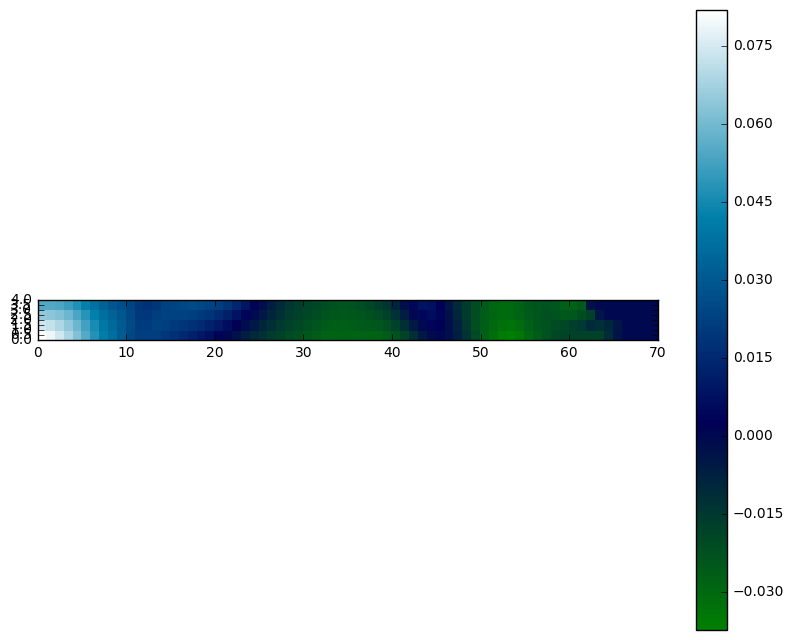

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(south_ssh[0,...], cmap =cm.ocean)
fig.colorbar(mesh)
plt.show()

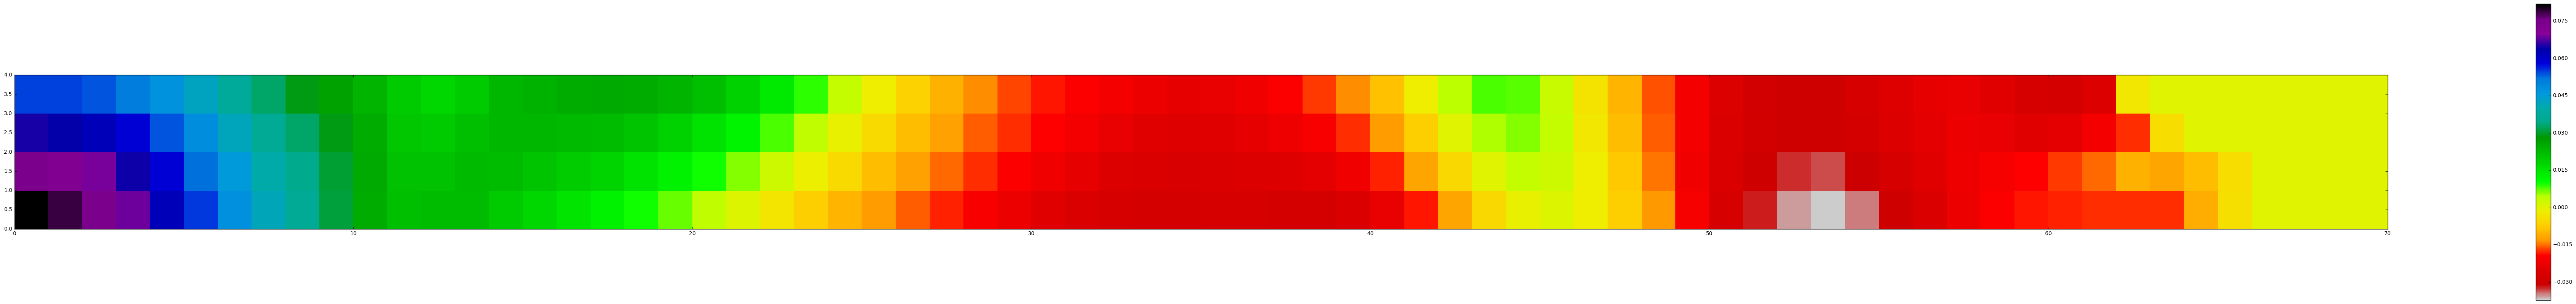

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(100, 10))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(south_ssh[0,...], cmap =cm.spectral_r)
fig.colorbar(mesh)
plt.show()

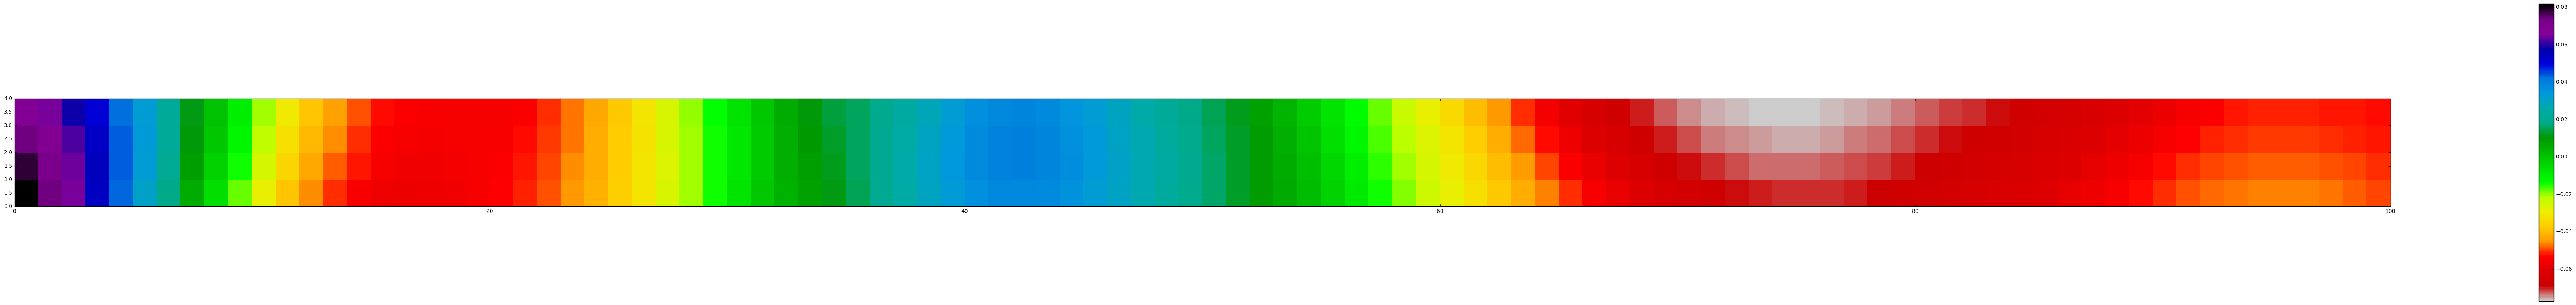

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(100, 10))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(west_ssh[0,...], cmap =cm.spectral_r)
fig.colorbar(mesh)
plt.show()

In [45]:
print(west_ssh.shape, south_ssh.shape)

(43, 4, 100) (43, 4, 70)
